In [4]:
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Exercise 2: Asymmetric Potential Well in Quantum Mechanics

Quantum mechanics can be formulated as a matrix problem that can be solved on a computer using linear algebra methods.  
For example, consider a particle of mass $m$ in a one-dimensional potential of length $L$ described by a function $V(x)$.

---


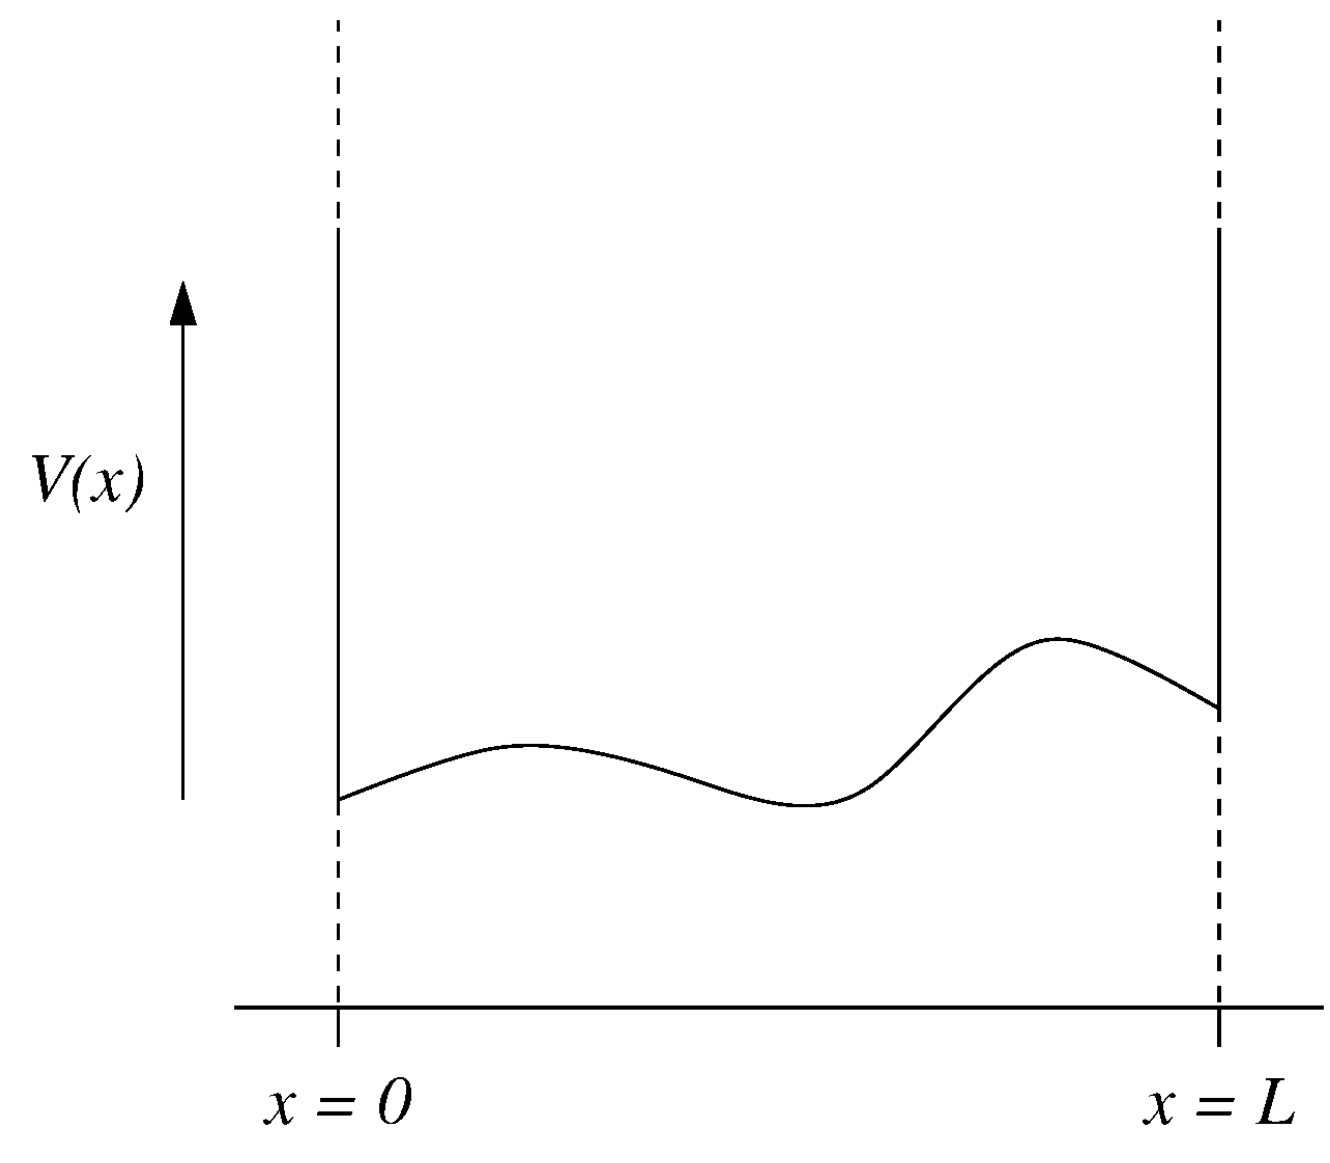

In [5]:
display(Image(filename="pozo.png", width=300, height=300))

In general, these problems cannot be solved analytically and must be analyzed on a computer.  
An energy eigenstate $E$ satisfies the time-independent Schrödinger equation:

$$\hat{H} \psi(x) = E \, \psi(x),$$

where the Hamiltonian satisfies:

$$\hat H = -\frac{\hbar^2}{2m} \frac{\text{d}^2}{\text{d}x^2} + V(x).$$

Assume that the potential walls have infinite height, allowing us to define the wavefunction as zero at $x = 0$ and $x = L$.

In that case, the wavefunction can be written as a Fourier series:

$$\psi(x) = \sum_{n=1}^\infty \psi_n \, \sin\frac{\pi n x}{L},$$

where $\psi_i$ with $i = 1, \cdots, \infty$ are the Fourier coefficients.

1. Considering that for two positive integers $m$ and $n$:

$$\int_0^L \sin\frac{\pi m x}{L} \, \sin\frac{\pi n x}{L} \, dx =
\begin{cases}
L/2 & \text{if } m = n, \\
0 & \text{otherwise,}
\end{cases}$$

show that the Schrödinger equation $\hat H \psi = E \psi$ implies:

$$\sum_{n=1}^\infty \psi_n \int_0^L \sin\frac{\pi m x}{L} \hat H \sin\frac{\pi n x}{L} \, dx = \frac{1}{2} L \, E \, \psi_m.$$

2. Defining the matrix $H$ with elements:

\begin{align}
H_{mn} =& \frac{2}{L} \int_0^L \sin\frac{\pi m x}{L} \, \hat H \, \sin\frac{\pi n x}{L} \, dx \nonumber\\
=& \frac{2}{L} \int_0^L \sin\frac{\pi m x}{L} \left[-\frac{\hbar^2}{2m} \frac{\text{d}^2}{\text{d}x^2} + V(x)\right] \sin\frac{\pi n x}{L} \, dx, \nonumber
\end{align}

show that the Schrödinger equation can be written in matrix form as:

$$H \cdot \psi = E \psi,$$

where $\psi = (\psi_1, \psi_2, \cdots)$ is thus an eigenvector of the Hamiltonian matrix $H$ with eigenvalue $E$.  
Knowing the eigenvalues of the matrix provides the possible energy levels of the particle.

3. Assuming now $V(x) = a x / L$, solve the integral analytically to find an expression for the matrix element $H_{mn}$. Show that the matrix is real and symmetric. Note that:

$$
\int_0^L x \, \sin\frac{\pi m x}{L} \, \sin\frac{\pi n x}{L} \, dx =
\begin{cases}
0 & \text{if } m \neq n \text{ and both are even or odd}, \\
- \left(\frac{2L}{\pi}\right)^2 \frac{mn}{(m^2 - n^2)^2} & \text{if } m \neq n \text{ and one is even, one is odd}, \\
L^2 / 4 & \text{if } m = n.
\end{cases}
$$

4. Write a program to compute $H_{mn}$ for any values of $m$ and $n$ for an electron in a well of width $L = 5 \mathring{A}$ and $a = 10$ eV.  
   (Hint: $m_e = 9.1094 \times 10^{-31}$ Kg and $e = 1.6022 \times 10^{-19}$ C.)

5. The matrix $H$ is infinitely large, so it is impossible to calculate all eigenvalues.  
   However, a very good approximate solution can be obtained by considering only the first few eigenvalues.  
   Create a $10 \times 10$ matrix of the matrix elements up to $m, n = 10$ and compute its eigenvalues and eigenvectors.

6. Now do the same with a $100 \times 100$ matrix and compare the results.

7. Plot the probability density $\vert \psi(x) \vert^2$ for the normalized wavefunction $\psi(x)$ for the ground state and the first two excited states.


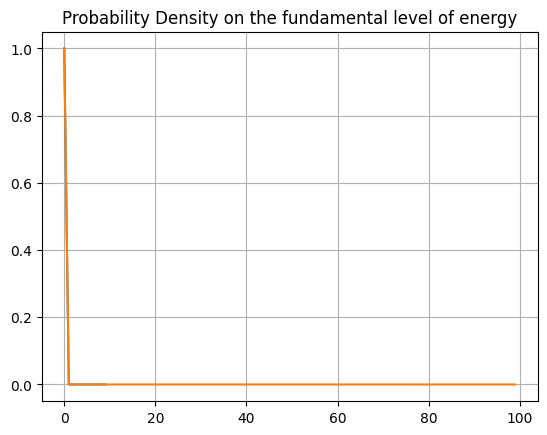

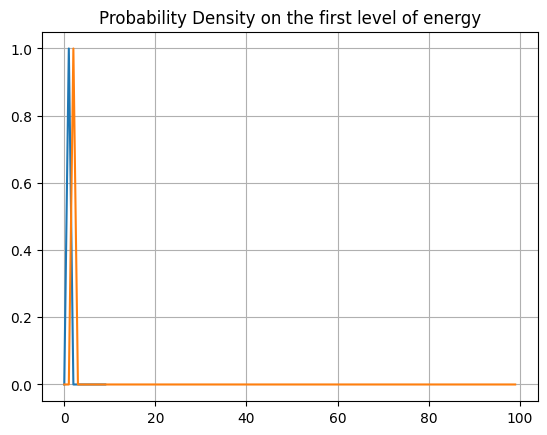

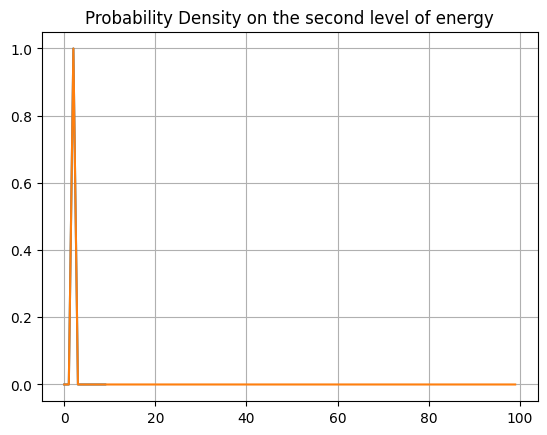

In [6]:
def module(v):
    """Module of a vector v.

    Args:
        v (np.array): 1-D array.

    Returns:
        np.array: module of argument vector
    """
    return np.sqrt(np.dot(v, v))


def QR(A, eps):
    """QR factorization of matrix A with accuracy eps

    Args:
        A (np.arrayt): matrix to factorize
        eps (float): desired accuracy

    Returns:
        np.array: two matrices corresponding to A's QR factorization
    """
    N = len(A)

    def QR_factorization(A):
        N = len(A)
        U = np.zeros([N, N], float)
        Q = np.zeros([N, N], float)
        R = np.zeros([N, N], float)

        for m in range(N):
            U[:, m] = A[:, m]
            for i in range(m):
                R[i, m] = np.dot(Q[:, i], A[:, m])
                U[:, m] -= R[i, m] * Q[:, i]
            R[m, m] = module(U[:, m])
            Q[:, m] = U[:, m] / R[m, m]
        return Q, R

    V = np.identity(N, float)
    delta = 1.0
    while delta > eps:
        Q, R = QR_factorization(A)
        A = np.dot(R, Q)
        V = np.dot(V, Q)
        Ac = np.copy(A)
        for i in range(N):
            Ac[i, i] = 0.0
        delta = np.max(np.absolute(Ac))
    for i in range(len(Q)):
        for j in range(len(Q)):
            A[i, j] = int(round(A[i, j]))
    return A, V

def hamiltonian(M, N):
    L, a, me, e = 5e-10, 10 * 1.6e-19, 9.1094e-31, 1.6022e-19
    h = 6.626e-34
    hbar = h / (2 * np.pi)
    H = np.zeros([M, N], float)
    for m in range(M):
        for n in range(N):
            if m == n:
                H[m, n] = (1 / (2 * me)) * (hbar * np.pi * n / L)**2 + a / 2
            elif m % 2 == n % 2:
                H[m, n] = 0
            else:
                H[m, n] = -8 * a * me * n / (np.pi * (m**2 - n**2))**2
    return H


H = hamiltonian(10, 10)
H2 = hamiltonian(100, 100)
dH, v = QR(H, 1e-5)
dH2, v2 = QR(H2, 1e-5)


plt.plot(v[0]**2)
plt.plot(v2[0]**2)
plt.grid()
plt.title('Probability Density on the fundamental level of energy')
plt.show()

plt.plot(v[1]**2)
plt.plot(v2[2]**2)
plt.grid()
plt.title('Probability Density on the first level of energy')
plt.show()

plt.plot(v[2]**2)
plt.plot(v2[2]**2)
plt.grid()
plt.title('Probability Density on the second level of energy')
plt.show()